

![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)


___

#### NAME: Kunhee Kim

#### STUDENT ID: 3036181095
___

## Visualization

In [1]:
#make compatible with Python 2 and Python 3
from __future__ import print_function, division, absolute_import

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# plotting
import matplotlib.pyplot as plt
%matplotlib inline


#### Data description
>Data source: https://shop.lululemon.com/<br>

<br>

___

## Data Statistics


In [2]:
# regular expressions, text parsing, and ML classifiers
import re
import nltk
import bs4 as bs
import numpy as np
import pandas as pd
 

# download NLTK classifiers
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# import ml classifiers
from nltk.tokenize import sent_tokenize # tokenizes sentences
from nltk.stem import PorterStemmer     # parsing/stemmer
from nltk.tag import pos_tag            # parts-of-speech tagging
from nltk.corpus import wordnet         # sentiment scores
from nltk.stem import WordNetLemmatizer # stem and context
from nltk.corpus import stopwords       # stopwords
from nltk.util import ngrams            # ngram iterator

eng_stopwords = stopwords.words('english')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kundoongs/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kundoongs/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kundoongs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kundoongs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<br>

**Load Data**

In [3]:
lululemon_data = pd.read_csv("/Users/kundoongs/Desktop/INDENG 135/lululemon_website_reviews_v3.csv")
lululemon_data.head()

,Unnamed: 0,rating,title,date,review,product,avg_rating
0,0,5,Sleek and warm,a day ago,Keeps me warm and is quite stylish. I like t...,Down for It All Vest,4.0
1,1,5,Love this vest!,5 days ago,"I love this vest! It’s so flattering on, plus...",Down for It All Vest,4.0
2,2,4,Make more!,7 days ago,Please make more Everglade Green! I have this...,Down for It All Vest,4.0
3,3,2,Vest,7 days ago,"I wear normally size 8, ordered size 10 so I ...",Down for It All Vest,4.0
4,4,2,Thinner and Thinner each year,9 days ago,I really wanted this vest because I have the ...,Down for It All Vest,4.0


<br>

___


## Text processing & Sentiment Analysis (LAST HOMEWORK)

In [4]:
from nltk.tokenize import sent_tokenize
import re

def review_cleaner(review):
    '''
        Clean and preprocess a review.
            1. Remove HTML tags
            2. Extract emoticons
            3. Use regex to remove all special characters (only keep letters)
            4. Make strings to lower case and tokenize / word split reviews
            5. Remove English stopwords
            6. Rejoin to one string
        
        @review (type:str) is an unprocessed review string
        @return (type:str) is a 6-step preprocessed review string
    '''
    
    #1. Remove HTML tags
    review = bs.BeautifulSoup(review).text
    
    #2. Use regex to find emoticons
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', review)
    
    #3. Remove punctuation
    review = re.sub("[^a-zA-Z]", " ",review)
    
    #4. Tokenize into words (all lower case)
    review = review.lower().split()
    
    #5. Remove stopwords
    eng_stopwords = set(stopwords.words("english"))
    review = [w for w in review if not w in eng_stopwords]
    
    #6. Join the review to one sentence
    review = ' '.join(review+emoticons)
    # add emoticons to the end

    return(review)

In [5]:
lululemon_data['cleaned_text'] = lululemon_data['review'].apply(review_cleaner)

In [6]:
! pip install vaderSentiment

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
obj = SentimentIntensityAnalyzer()

In [9]:
def predict_sentiment(sentence):
    return obj.polarity_scores(sentence)

In [10]:
lululemon_data['polarity_score'] = lululemon_data['cleaned_text'].apply(predict_sentiment)

In [11]:
def extract_compound(dict):
    return dict['compound']

In [12]:
lululemon_data['Sentiment'] = lululemon_data['polarity_score'].apply(extract_compound)

In [13]:
lululemon_data.head()

,Unnamed: 0,rating,title,date,review,product,avg_rating,cleaned_text,polarity_score,Sentiment
0,0,5,Sleek and warm,a day ago,Keeps me warm and is quite stylish. I like t...,Down for It All Vest,4.0,keeps warm quite stylish like burgundy color well,"{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'comp...",0.6983
1,1,5,Love this vest!,5 days ago,"I love this vest! It’s so flattering on, plus...",Down for It All Vest,4.0,love vest flattering plus great option cold en...,"{'neg': 0.0, 'neu': 0.402, 'pos': 0.598, 'comp...",0.9245
2,2,4,Make more!,7 days ago,Please make more Everglade Green! I have this...,Down for It All Vest,4.0,please make everglade green vest previous year...,"{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'comp...",0.3182
3,3,2,Vest,7 days ago,"I wear normally size 8, ordered size 10 so I ...",Down for It All Vest,4.0,wear normally size ordered size wear clothes s...,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",0.5994
4,4,2,Thinner and Thinner each year,9 days ago,I really wanted this vest because I have the ...,Down for It All Vest,4.0,really wanted vest jacket tried store sizing s...,"{'neg': 0.099, 'neu': 0.901, 'pos': 0.0, 'comp...",-0.3182


<br>

___


## Data Visualization



In [14]:
import seaborn as sns

# Visualization of Number of Reviews in Each Product

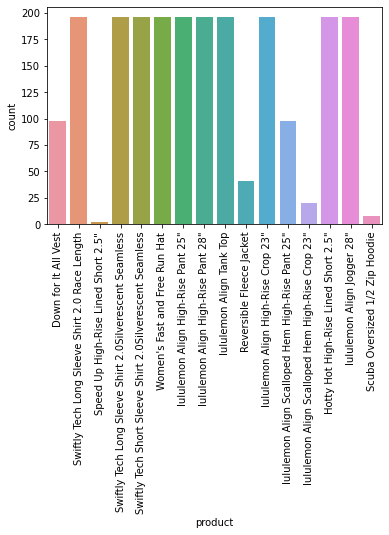

In [15]:
x = sns.countplot(x='product', data = lululemon_data)
x.tick_params(axis='x', rotation=90)

#### Interpretation: 'Speed Up High-Rise Lined Short 2.5' and 'lululemon Align Scalloped Hem High-RIse Crop 23"' and "Scuba Oversized 1/2 Zip Hoodie" has low number of reviews

# Visualization of distribution of negative vs positive Sentiment by product

In [16]:
lululemon_data['negative'] = lululemon_data['Sentiment']<0
lululemon_data.head()

,Unnamed: 0,rating,title,date,review,product,avg_rating,cleaned_text,polarity_score,Sentiment,negative
0,0,5,Sleek and warm,a day ago,Keeps me warm and is quite stylish. I like t...,Down for It All Vest,4.0,keeps warm quite stylish like burgundy color well,"{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'comp...",0.6983,False
1,1,5,Love this vest!,5 days ago,"I love this vest! It’s so flattering on, plus...",Down for It All Vest,4.0,love vest flattering plus great option cold en...,"{'neg': 0.0, 'neu': 0.402, 'pos': 0.598, 'comp...",0.9245,False
2,2,4,Make more!,7 days ago,Please make more Everglade Green! I have this...,Down for It All Vest,4.0,please make everglade green vest previous year...,"{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'comp...",0.3182,False
3,3,2,Vest,7 days ago,"I wear normally size 8, ordered size 10 so I ...",Down for It All Vest,4.0,wear normally size ordered size wear clothes s...,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",0.5994,False
4,4,2,Thinner and Thinner each year,9 days ago,I really wanted this vest because I have the ...,Down for It All Vest,4.0,really wanted vest jacket tried store sizing s...,"{'neg': 0.099, 'neu': 0.901, 'pos': 0.0, 'comp...",-0.3182,True


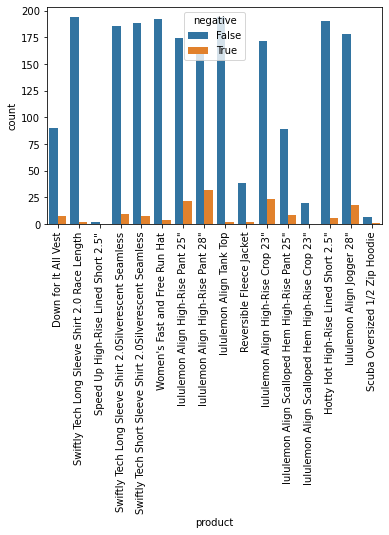

In [17]:
ax = sns.countplot(x="product", hue="negative", data=lululemon_data)
ax.tick_params(axis='x', rotation=90)

In [18]:
lululemon_data[lululemon_data['negative']== False].size

22869

#### Interpretation: It seems like there are large proportion of positive reviews than negative reviews.

# Visualization of Multiple Categorical Variables vs. Numerical Variables using Histograms

In [19]:
product = lululemon_data['product'].unique()
product

array(['Down for It All Vest',
       'Swiftly Tech Long Sleeve Shirt 2.0 Race Length',
       'Speed Up High-Rise Lined Short 2.5"',
       'Swiftly Tech Long Sleeve Shirt 2.0Silverescent Seamless',
       'Swiftly Tech Short Sleeve Shirt 2.0Silverescent Seamless',
       "Women's Fast and Free Run Hat",
       'lululemon Align High-Rise Pant 25"',
       'lululemon Align High-Rise Pant 28"', 'lululemon Align Tank Top',
       'Reversible Fleece Jacket', 'lululemon Align High-Rise Crop 23"',
       'lululemon Align Scalloped Hem High-Rise Pant 25"',
       'lululemon Align Scalloped Hem High-Rise Crop 23"',
       'Hotty Hot High-Rise Lined Short 2.5"',
       'lululemon Align Jogger 28"', 'Scuba Oversized 1/2 Zip Hoodie'],
      dtype=object)

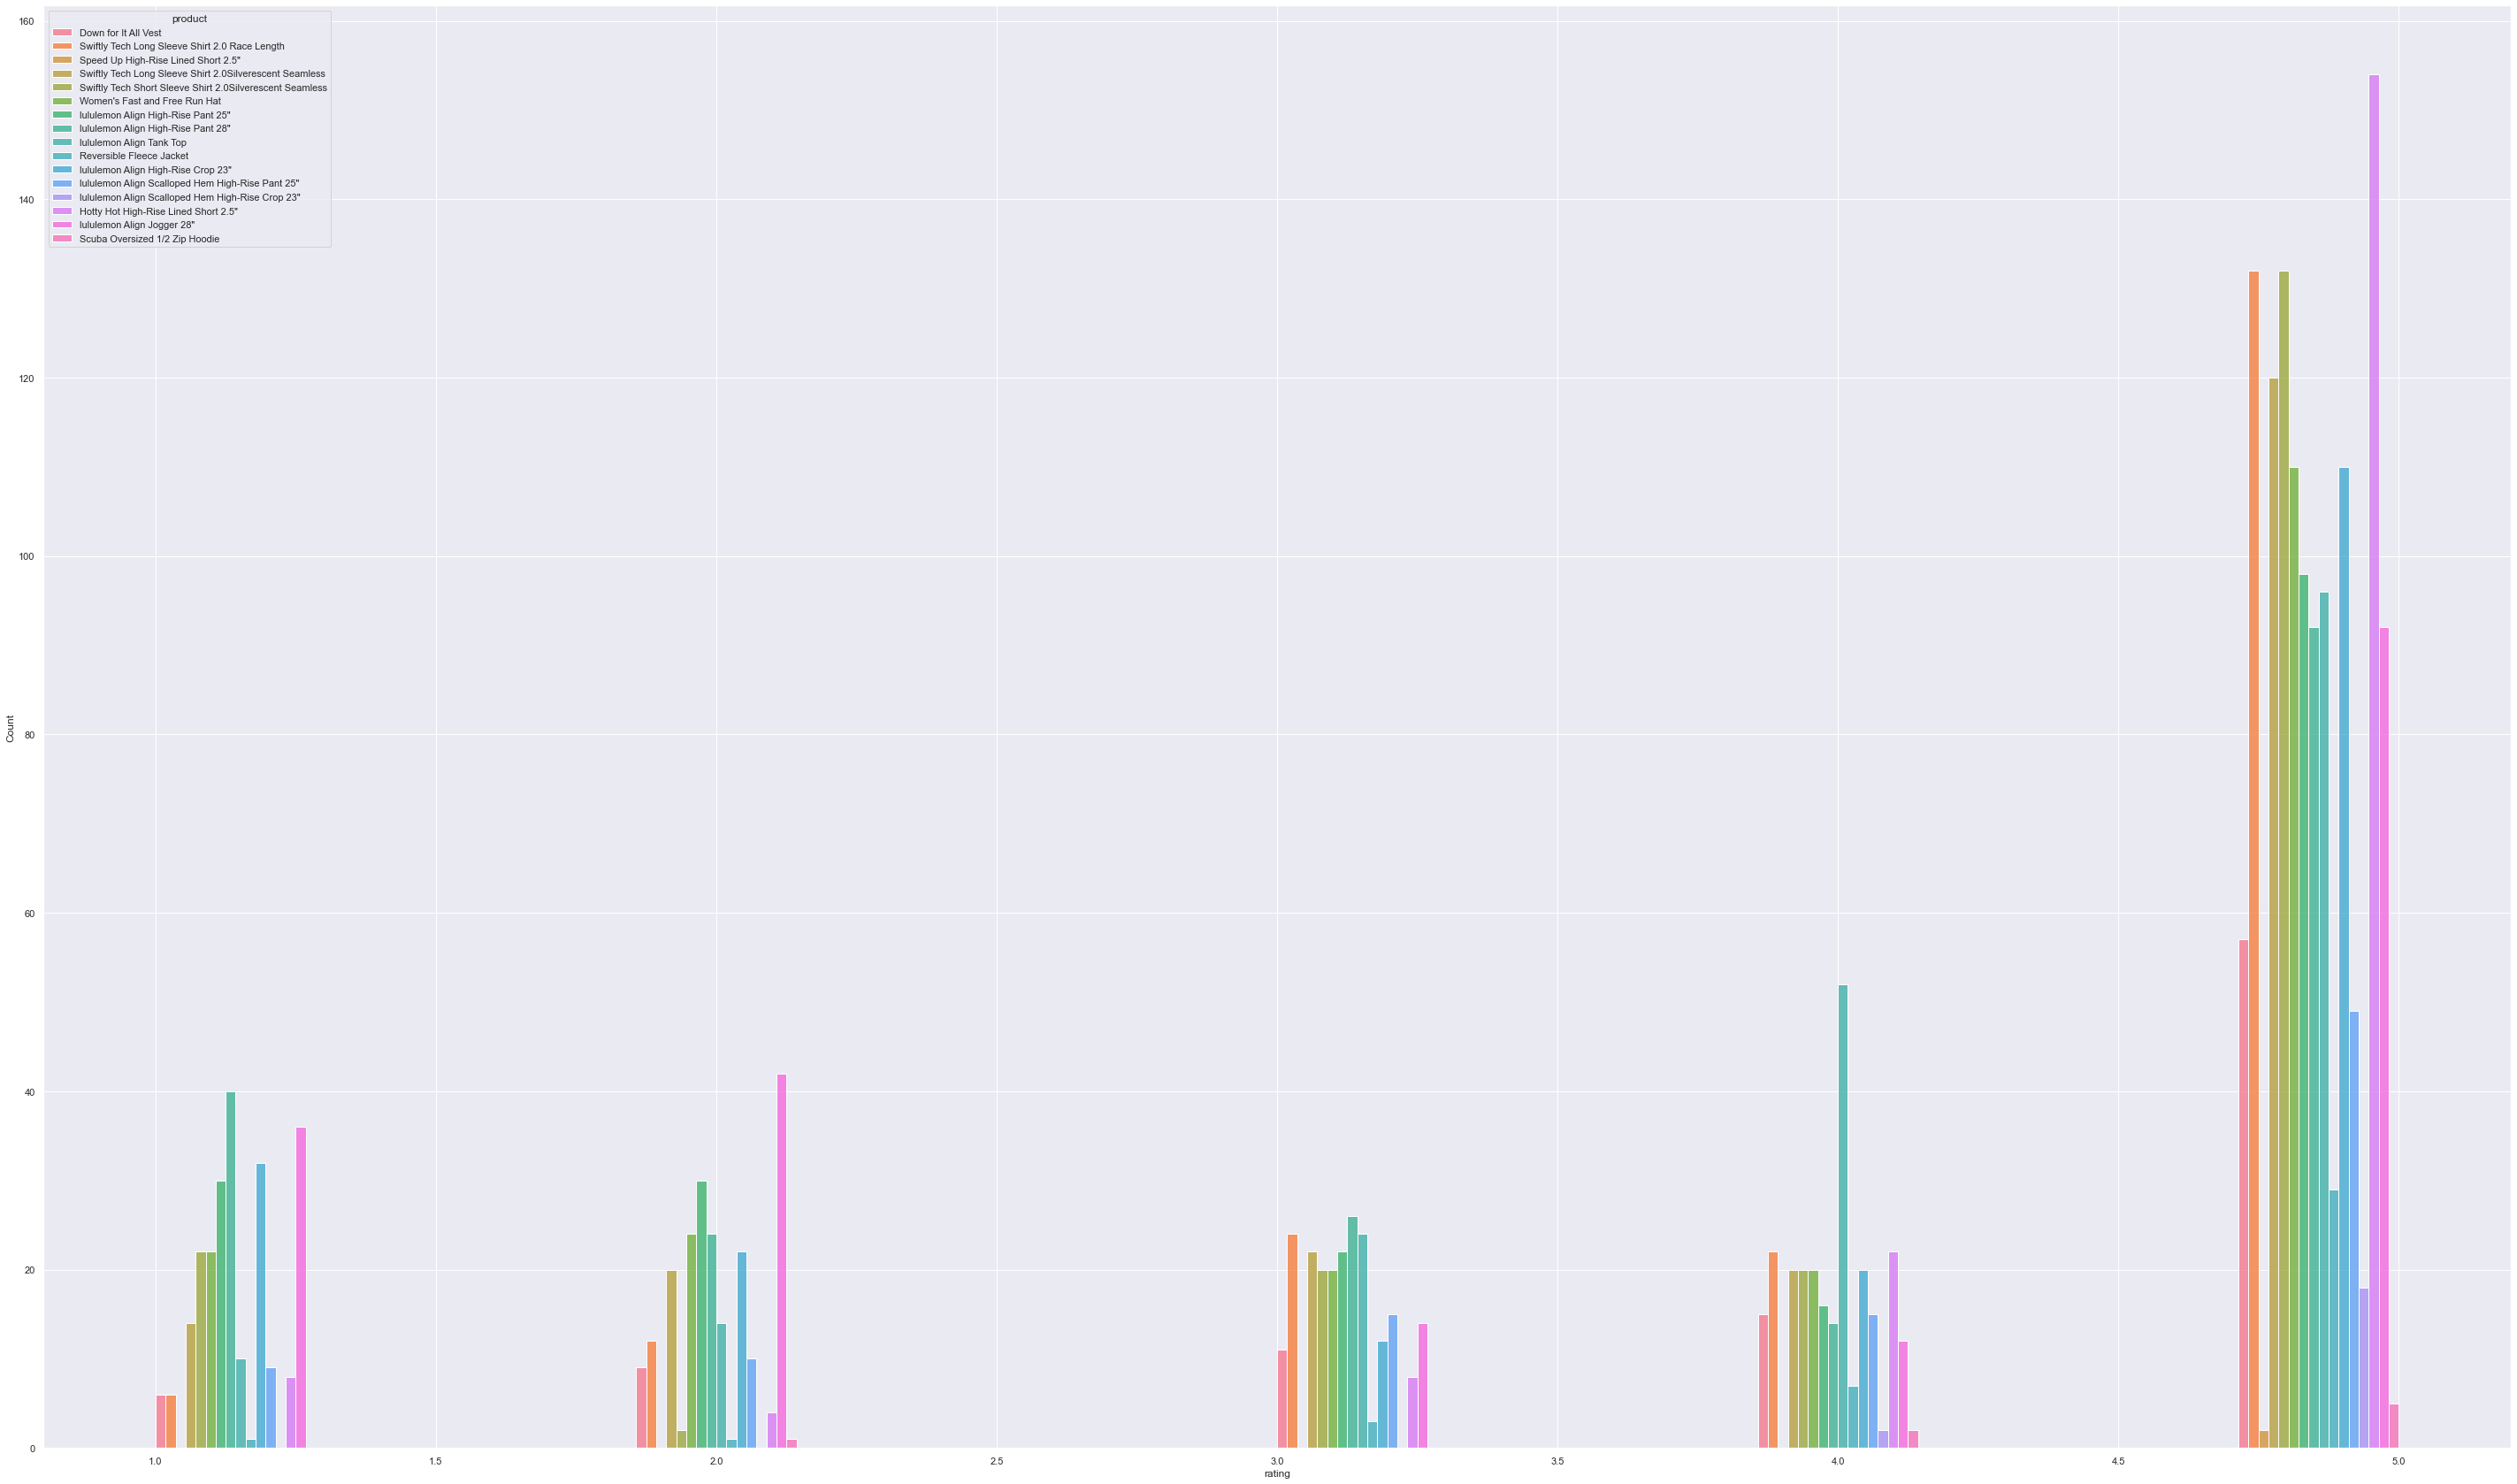

In [28]:
sns.histplot(data=lululemon_data, x="rating", hue="product",multiple='dodge')
sns.set(rc={'figure.figsize':(30,10)})

#### Interpretation: Histogram of Rating by Product shows that almost every product has the highest frequency of 5-rated reviews.

# Visualization of Numerical (rating) VS. Numerical Variable (sentiment) using Scatter Plot

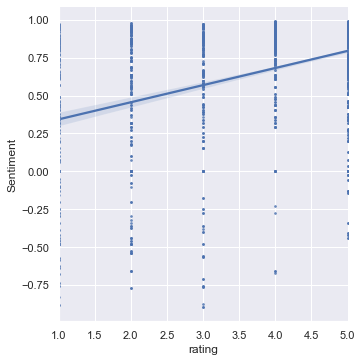

In [21]:
sns.lmplot(data=lululemon_data, x="rating", y="Sentiment", scatter_kws={'s': 3, 'alpha': 0.7})
sns.set(rc={'figure.figsize':(30,10)})

#### Interpretation: It seems like there is a linear corrleation between rating and sentiment.